#Credit Card Customer Clustering

## 1.Introduction

## Project Overview:

*  This project analyzes the behavior of 9,000 credit card users over the past six months to segment them into distinct groups.
*   The goal is to identify customer segments for targeted and effective marketing strategies.

#Let's start!

#1.1 Install the Required Libraries

In [1]:
#!pip install opendatasets --upgrade --quiet
#!pip install pyclustertend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible

#1.2 Import Libraries

In [3]:
# Data loading library
import opendatasets as od

# Data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn .preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#warnings
import warnings
warnings.filterwarnings('ignore')


#Load the Dataset

In [4]:
# Download the dataset
od.download('https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data')

Dataset URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


100%|██████████| 340k/340k [00:00<00:00, 70.7MB/s]

In [5]:
# load the dataset
df = pd.read_csv('/content/ccdata/CC GENERAL.csv')

# Display the first few rows of the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Data Exploration and Descriptive Statistics

In [6]:
# check for general info about the dataset (data types, non-null counts)
df.info()

# Summary statistics for numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Check for Missing Values

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(f'Missing values per column:\n{missing_values}')

Missing values per column:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


There are only two column have missing values- 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT'

First stage is to remove variables that are not needed for the clustering process. In this case, CUST_ID will be removed since it has unique values.

In [15]:
# --- Dropping `CUST_ID` Column ---
df = df.drop(['CUST_ID'], axis=1)

#Data Visualization (Exploratory Data Analysis)

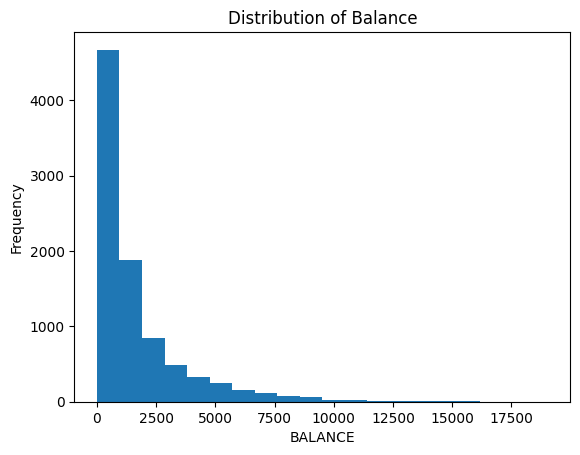

In [8]:
# Plot histogram for numrical features
plt.hist(df['BALANCE'], bins=20)
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

Insight:


*   Most of the Users balance are lie in range (0 - 2500)



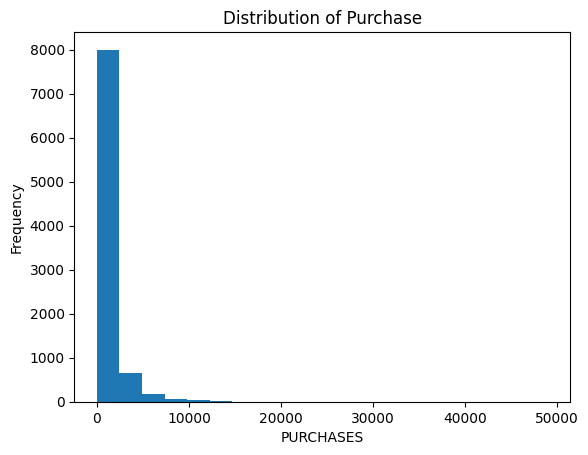

In [9]:
plt.hist(df['PURCHASES'], bins=20)
plt.xlabel('PURCHASES')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase')
plt.show()

Insight:


*   Majority Users Purchasing amount lie in range (0-10000)




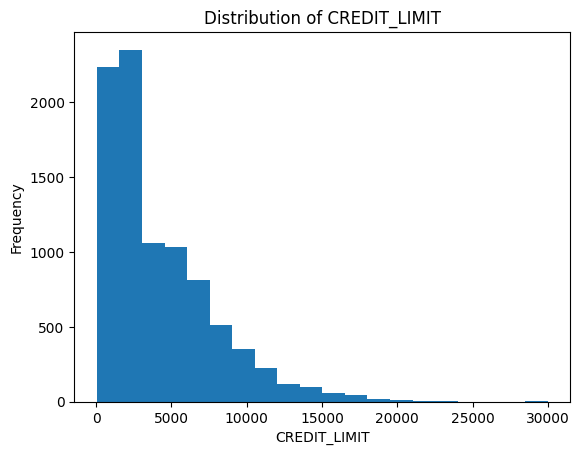

In [10]:
plt.hist(df['CREDIT_LIMIT'], bins=20)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frequency')
plt.title('Distribution of CREDIT_LIMIT')
plt.show()

Insight:


*   Majority Users Credit limit lie in range(0-7000)




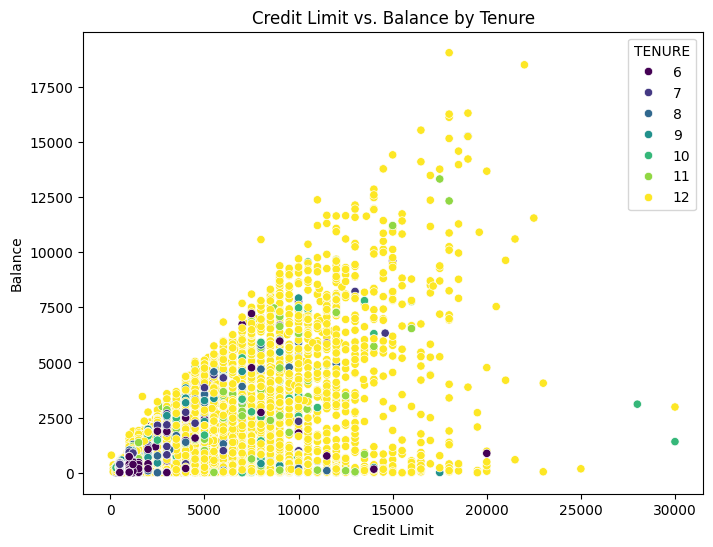

In [11]:
# Scatter plot to visualize relationship between variables
plt.figure(figsize=(8,6))
sns.scatterplot(x='CREDIT_LIMIT',y='BALANCE',hue='TENURE',data=df,palette='viridis')
plt.title('Credit Limit vs. Balance by Tenure')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.show()

Insight:


*   There are positive correlation between both variables,
*   Most credit card users prefer 12 months



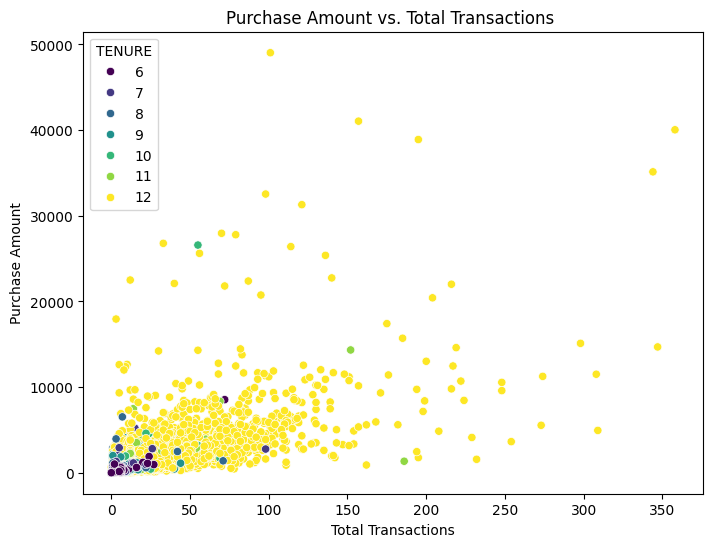

In [12]:
#comparison between variables
plt.figure(figsize=(8,6))
sns.scatterplot(x='PURCHASES_TRX',y='PURCHASES',hue='TENURE',data=df,palette='viridis')
plt.title('Purchase Amount vs. Total Transactions ')
plt.xlabel('Total Transactions')
plt.ylabel('Purchase Amount')
plt.show()

Insight:


*  credit card customers with 12 months of tenure are willing to take the purchase amount and have more total purchase transactions than customers with other tenure periods.


*   some customers deliberately do not make any transactions at all





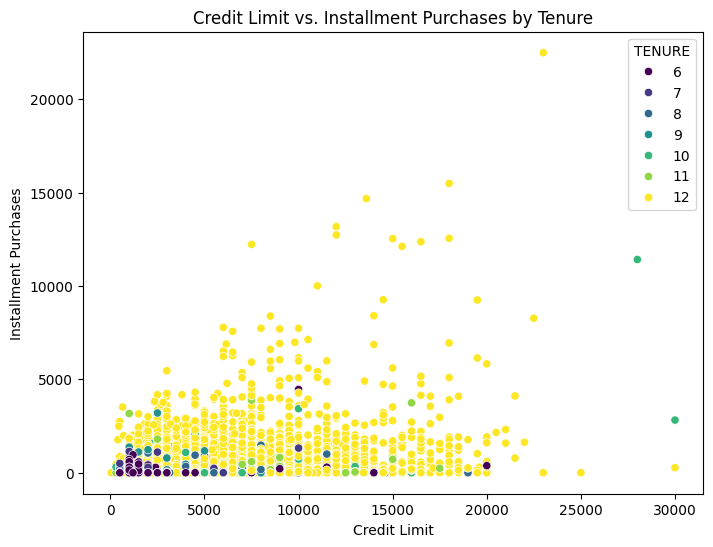

In [13]:
# Visualize Scatter Plot of Credit Limit vs. Installment Purchases, Colored by Tenure
plt.figure(figsize=(8,6))
sns.scatterplot(x='CREDIT_LIMIT', y='INSTALLMENTS_PURCHASES',hue='TENURE', data=df, palette='viridis')
plt.title('Credit Limit vs. Installment Purchases by Tenure')
plt.xlabel('Credit Limit')
plt.ylabel('Installment Purchases')
plt.show()

Insight:


*   There is no heteroscedasticity detected between the credit limit and installment purchases.
*   The scatter plot shows no correlation between both variables since the scatter plot shows a random pattern.



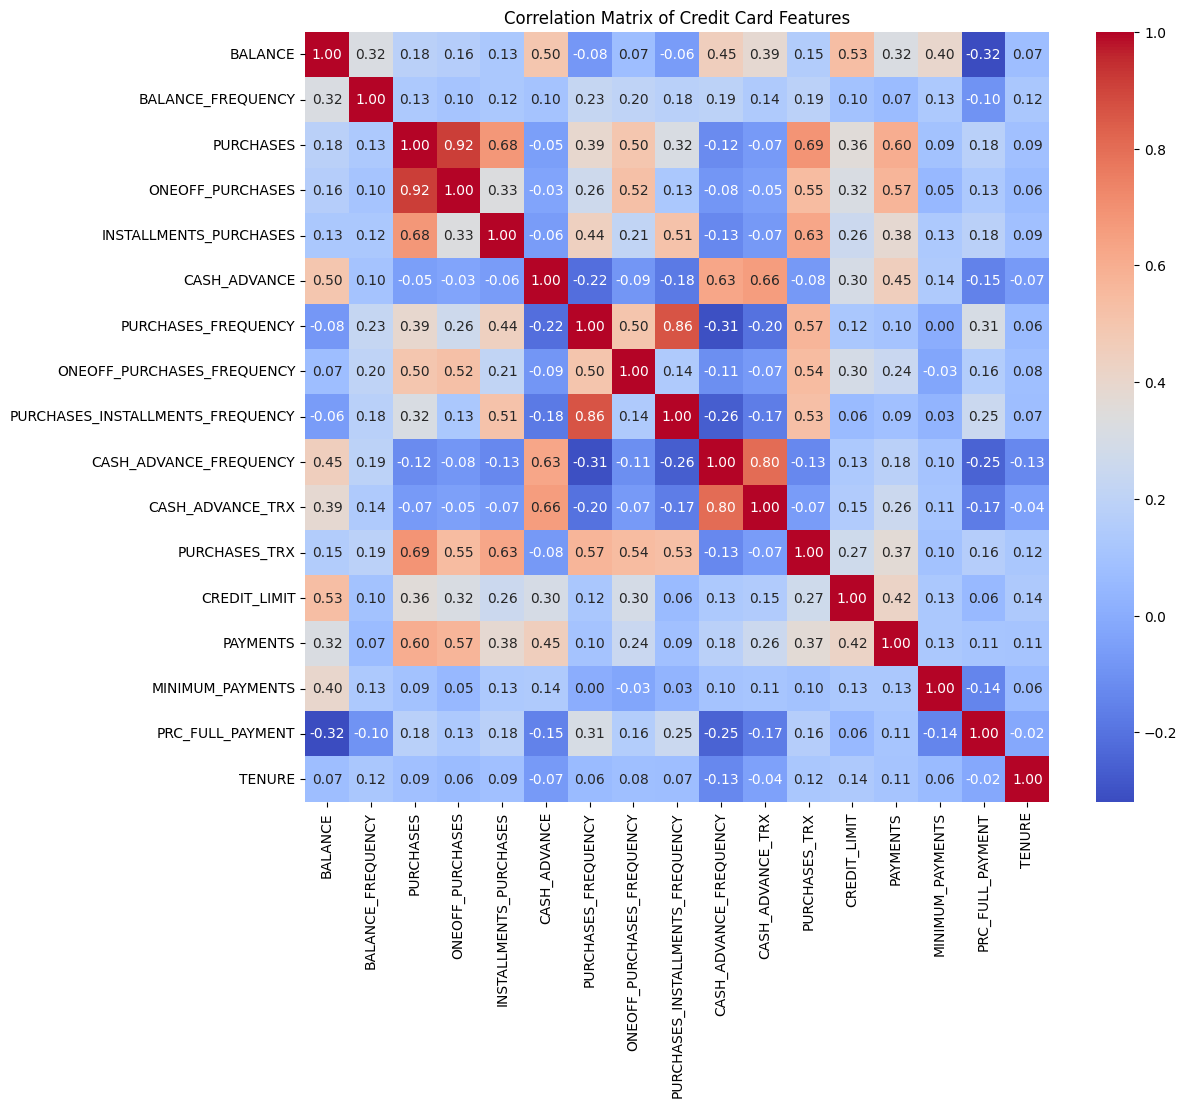

In [16]:
#correlation map of numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Credit Card Features')
plt.show()

Insight:


*   Some variables have significant correlation with other variables (>0.5)



#Feature Engineering & Data Pre-processing

Handle Missing Values

In [18]:
# Fill missing values in numerical columns  with KNNImputer
null_columns = df.columns[df.isnull().any()].tolist()

# Perform Imputation
imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

#Scaling

In [19]:
# Scale the features using MinMaxScaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#Hopkins Test

Let's perform a statistical test using the Hopkins statistical test for the preprocessed dataset to measure the clustering tendency of data (measure to what degree clusters exist in the data to be clustered).

The following is the hypothesis of the Hopkins statistical test.


*   H0: The dataset is not uniformly distributed (contains meaningful clusters).
*   H1: The dataset is uniformly distributed (no meaningful clusters).



Criteria:


*   If the value is between {0.6, ..., 0.99}, accept H0 (it has a high tendency to cluster).




In [20]:
#hopkins test
#import the function
from pyclustertend import hopkins

#Apply th hopkins statistic
hopkins_statistic = hopkins(scaled_df, scaled_df.shape[0])
print(f"Hopkins Statistic: {hopkins_statistic}")

Hopkins Statistic: 0.06131209315492646


From the result above, it have moderate tendency to cluster,


Conclusion:
*   Accept H0(Null hypothesis)



#PCA
Principal component analysis (PCA) is a method used in unsupervised machine learning (such as clustering) that reduces high-dimension data to smaller dimensions while preserving as much information as possible

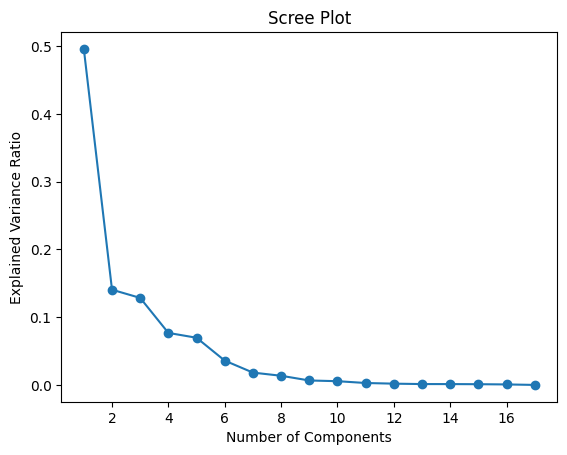

In [21]:
# Assuming 'scaled_df' is your scaled DataFrame
pca = PCA()
pca.fit(scaled_df)

    # Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

    # Scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

Insight:


*    This indicates that the 2 components capture a substantial portion of the variance in the data.




Apply PCA with 2 Components:

In [22]:
#Convert to Numpy  array for more robust practice
X_df=scaled_df.values

#Apply PCA
pca = PCA(n_components=2,random_state=42)
pca_result = pca.fit_transform(X_df)

#Clustering Model

#K-Means Clustering

Before implementing K-Means, the first step is to calculate the optimal number of clusters using the elbow and silhouette score

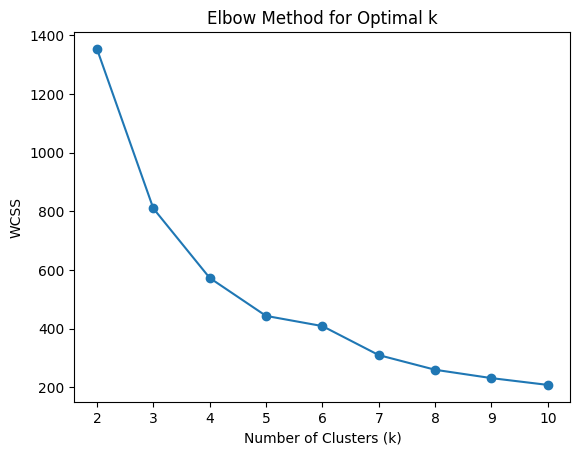

In [25]:
# Elbow method
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(pca_result)
  wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

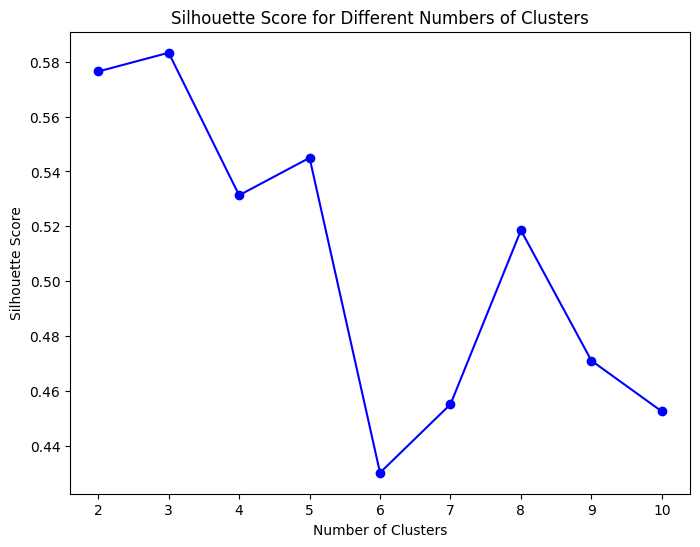

In [26]:
from sklearn.metrics import silhouette_score

# Try different values of k (number of clusters) and calculate the silhouette score
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42)
    kmeans.fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [27]:
# Find the optimal k with the highest silhouette score
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


Insight:


*    Based on the results of the elbow method and silhouette score above, it can be concluded that the best clustering number for the K-Means algorithm is 3 clusters.



Applying KMeans with optimal k-value

In [57]:
#KMeans object
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)

#Fitting KMeans to data
kmeans.fit(pca_result)

#cluster labels
labels = kmeans.labels_

# Add cluster labels to oiginal dataframe
scaled_df['cluster'] = labels

Visualizing clusters

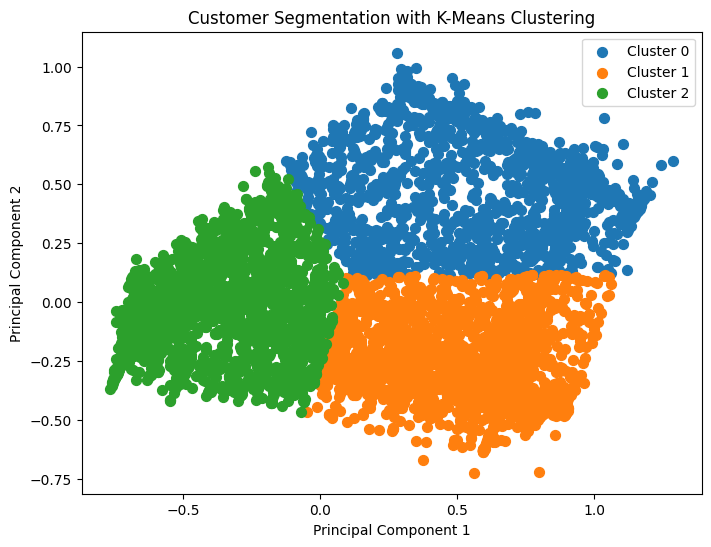

In [58]:

plt.figure(figsize=(8, 6))

# Scatter plot with labels for each cluster
for cluster in range(3):
    plt.scatter(pca_result[labels == cluster, 0], pca_result[labels == cluster, 1],
                label=f'Cluster {cluster}', s=50)

plt.legend()  # Display the legend

plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

Insight:
All the clusters have a similar wide of fluctuations. However, from the thickness, clusters 1 and 2 have a thicker consistency than cluster 0.

#Evaluate the Clustering Performance

Clustering Metrics:

*   Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. Higher scores (closer to 1) indicate better clustering.
*   Davies-Bouldin Index: Measures the average similarity between each cluster and its most similar cluster. Lower scores indicate better clustering.







*  Calinski-Harabasz Index: Measures the ratio of between-cluster variance to within-cluster variance. Higher scores indicate better-defined clusters.



In [59]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

#silhouette_score
sil_score = silhouette_score(pca_result,scaled_df['cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

#Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(pca_result,scaled_df['cluster'] )
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

#Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(pca_result,scaled_df['cluster'])
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")


Silhouette Score: 0.583
Davies-Bouldin Index: 0.751
Calinski-Harabasz Index: 16404.162


Calculate Cluster Profiles

In [60]:
# Group by clusters and calculate the mean of each feature
cluster_profiles = scaled_df.groupby('cluster').mean()

# Display the cluster profiles
print(cluster_profiles)


          BALANCE  BALANCE_FREQUENCY  PURCHASES  ...    TENURE  Kmeans_cluster  dbscan_cluster
cluster                                          ...                                          
0        0.105754           0.977352   0.064481  ...  0.963525             0.0        0.000000
1        0.055573           0.908137   0.020903  ...  0.917034             1.0       -0.000368
2        0.089899           0.827243   0.006030  ...  0.906853             2.0        0.000000

[3 rows x 19 columns]


Visualize Cluster Profiles

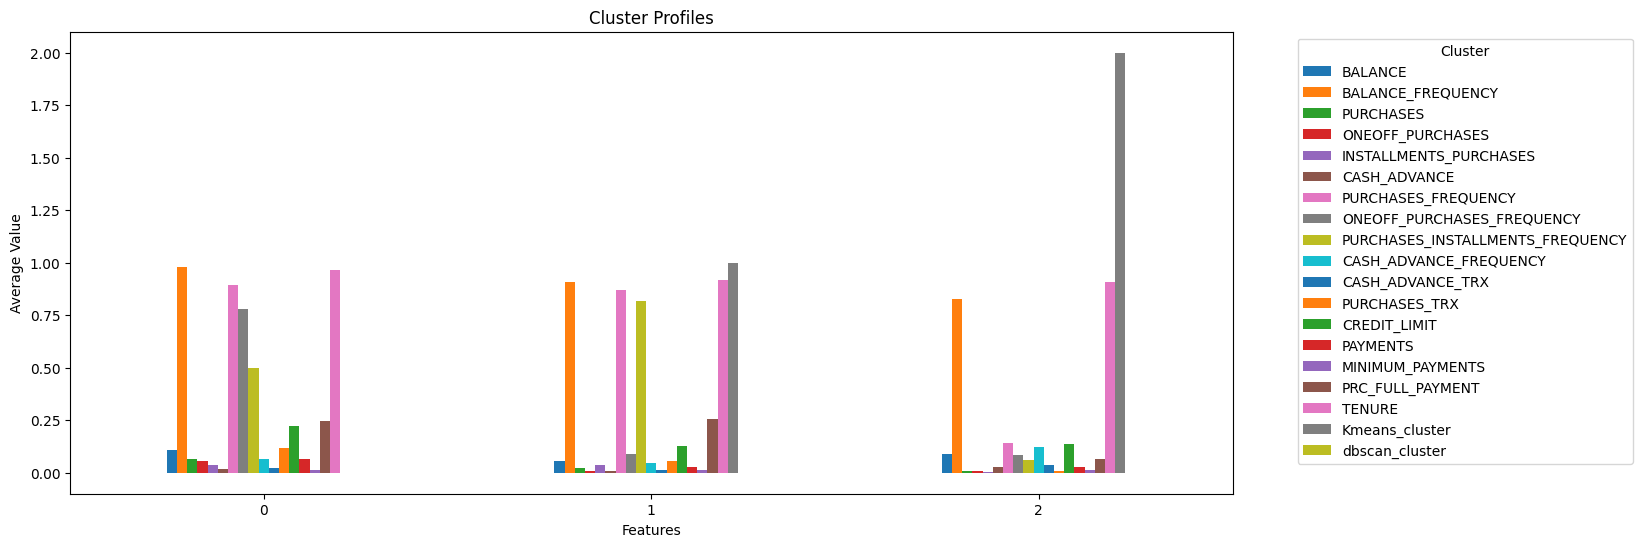

In [62]:
# visualize clusters
cluster_profiles.plot(kind='bar', figsize=(15, 6))
plt.title('Cluster Profiles')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Conclusions

Based on the figure above, it can be concluded that each cluster has the following characteristics:

1.Cluster 0: Big Spenders / High-Value Customers

Characteristics: High balances, frequent purchases, high credit limits, high payments, longer tenure.
Category: This cluster aligns well with the "High-Value Customers" segment. They are the most profitable customers, consistently using their cards for large purchases and demonstrating a strong financial standing. They might also be categorized as "Full Payers" due to their relatively high tendency to make full payments, indicating responsible financial behavior.

2.Cluster 1: Regular Users / Transactors

Characteristics: Moderate balances, consistent purchases, moderate credit limits, high tendency to pay in full, moderate tenure.
Category: This cluster aligns with the "Transactors" or "Regular Users" segment. They use their cards for everyday purchases and typically pay their bills on time. They exhibit responsible financial behavior but might not have the same spending power as the high-value customers. They can also be considered as "Full Payers" due to their high tendency to make full payments.

3.Cluster 2: Inactive Users / Revolvers

Characteristics: Low balances, infrequent purchases, lower credit limits, lower full payment tendency, reliance on cash advances.
Category: This cluster has characteristics of both "Revolvers" and "Inactive Users". They tend to carry a balance and might be using cash advances more frequently, indicating potential financial constraints or less responsible credit card usage. The lower spending and purchase frequency might categorize them as "Students/Starters" who are new to using credit cards and have limited financial resources. However, their moderate tenure suggests they may not necessarily be entirely new to credit




# Some Insights based on clusters

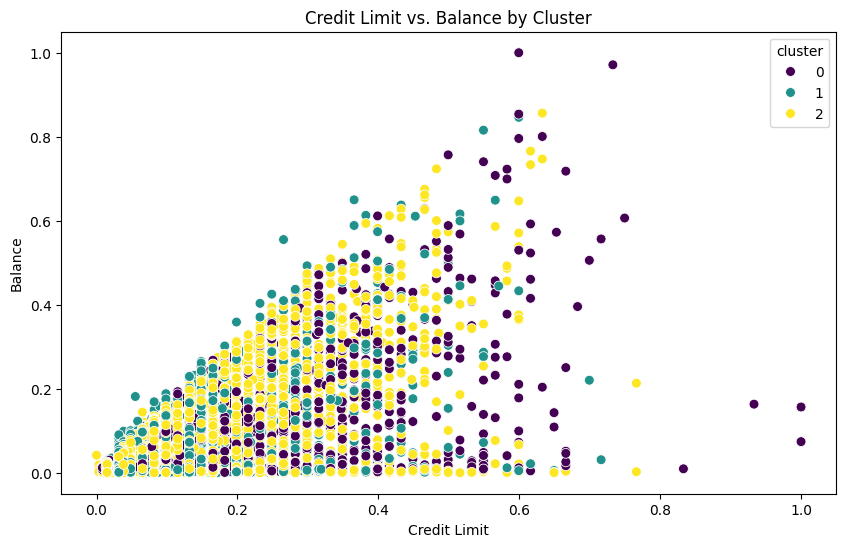

In [63]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', hue='cluster', data=scaled_df, palette='viridis', s=50)
plt.title('Credit Limit vs. Balance by Cluster')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.show()

Insight:


*    It can be seen that clusters 2 and 0 have the highest balance and credit limit.
*    In addition, it can be seen that the more the balance increases, the more credit limits the customer gets



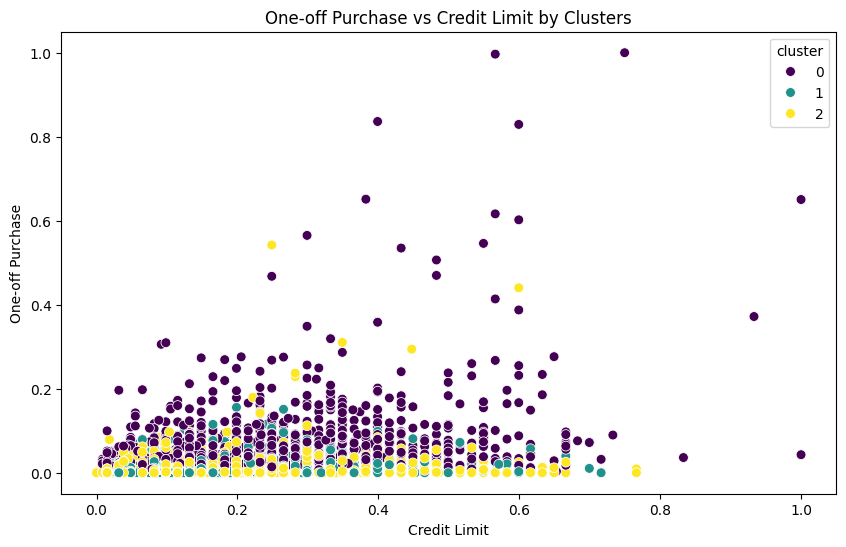

In [70]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='cluster', data=scaled_df, palette='viridis', s=50)
plt.title('One-off Purchase vs Credit Limit by Clusters')
plt.xlabel('Credit Limit')
plt.ylabel('One-off Purchase')
plt.show()

Insight:


*   One-off purchase does not affect the additional credit limit obtained by the user.
*   it can be seen that cluster 0 has a customer with the largest purchase amount for one transaction.





#Marketing Strategy Suggestions



Credit Card Marketing: Precision Targeting for Growth

Big Spenders: Elevate rewards, personalize offers, and provide VIP experiences to maximize spending and loyalty.

Regular Users: Promote installment programs with attractive terms and merchant partnerships to drive purchase frequency.

Inactive Users: Offer entry-level cards, financial education, and upgrade paths to encourage responsible credit building and card activation..




# References



1.   Kaggle notebook - clustering on Credit Card Dataset
2.   Kmeans clustering - Jovian_Tutorials(unsupervised ML Algo)

1.   Hopkins Test - Medium Blog
2.   Scikit-Learn - Selecting the number of clusters with elbow method and silhouette  analysis on KMeans clustering



